In [43]:
import os
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import librosa
import librosa.display
import src.conf as conf
from scipy.ndimage import gaussian_filter
from sklearn.preprocessing.data import minmax_scale

In [109]:
import numpy as np
window_size = 1024
overlap = 0.95
max_freq = 8000
min_freq = 0
sample_rate = 16000
hop_length = int(window_size * (1 - overlap))  
hz_per_bin = (sample_rate/2) / (1+window_size/2)

## Read 5 minute segment

In [110]:
wav_file = os.path.join(conf.wav_path, conf.target_file_test + '.wav')
samples, _ = librosa.load(wav_file, sr=sample_rate, offset=6030, duration=10)

## Plot all preprocessing steps

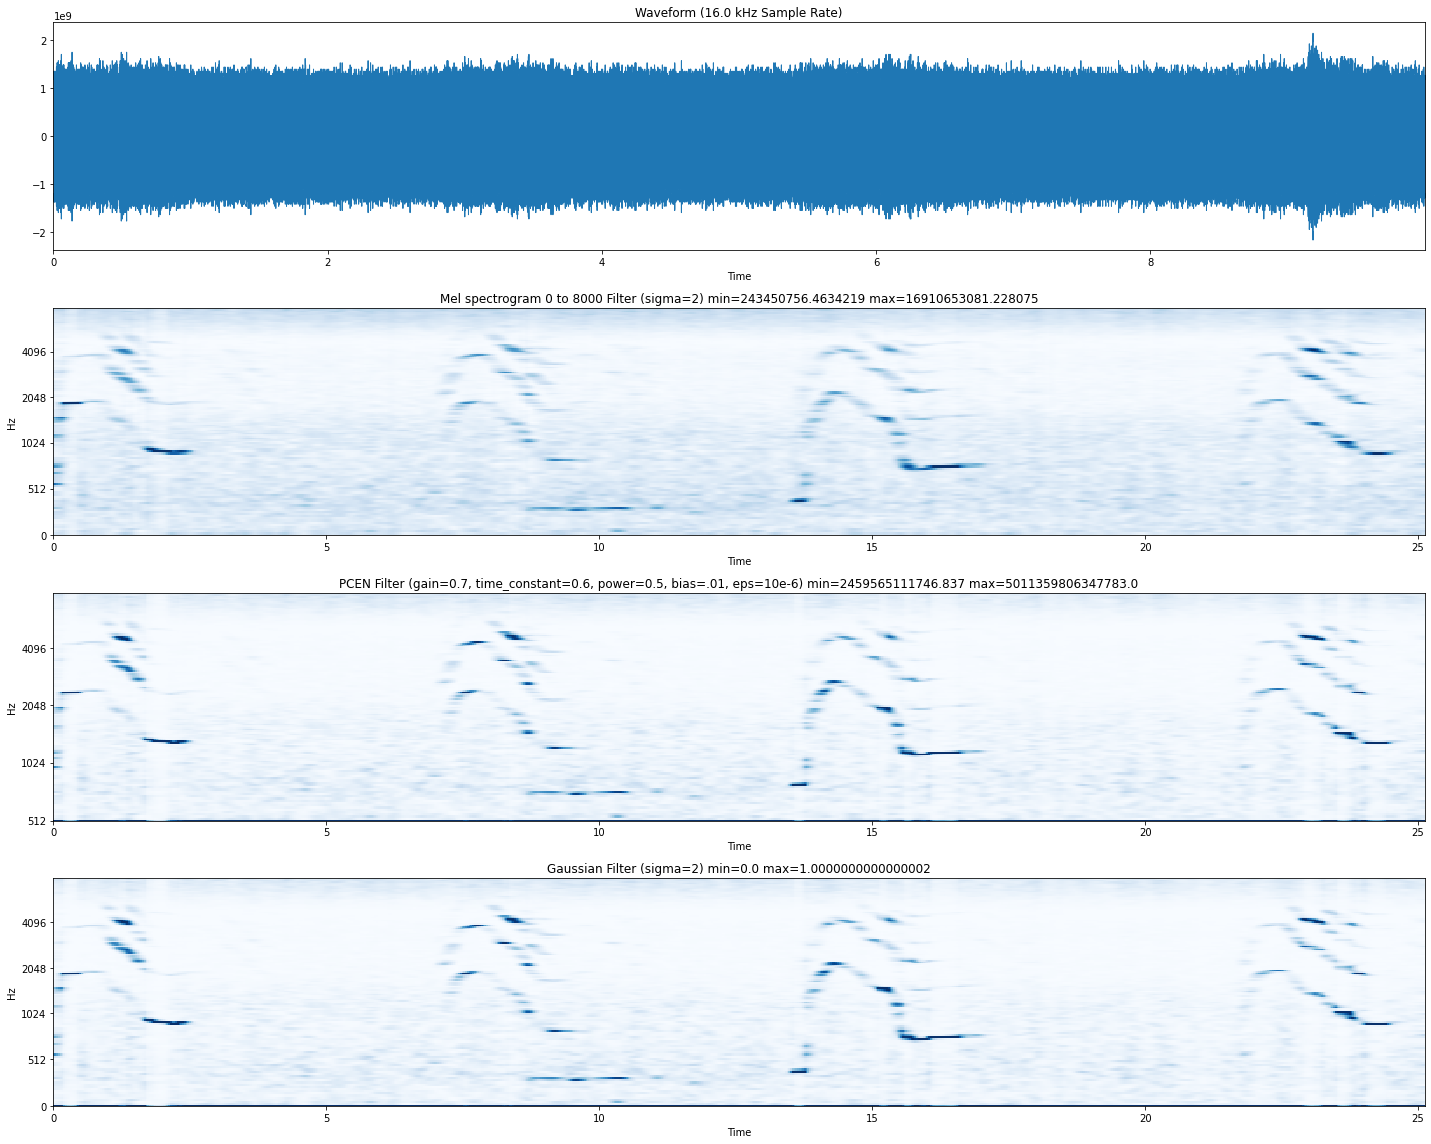

In [115]:
fig = plt.figure(figsize=(20, 16))
# Waveform
plt.subplot(4, 1, 1)
librosa.display.waveplot(samples, sr=sample_rate)
plt.title(f'Waveform ({sample_rate/1000} kHz Sample Rate)')

samples = minmax_scale(samples, feature_range=( 0, (2**31)))

# Mel spectrogram
stft = librosa.feature.melspectrogram(samples, n_fft=window_size, hop_length=hop_length, sr=sample_rate, 
                                      power=1, fmax=max_freq, fmin=min_freq)
plt.subplot(4, 1, 2)
audio_scaled = minmax_scale(stft, feature_range=(0,1))
librosa.display.specshow(audio_scaled, sr=sample_rate, x_axis='time', y_axis='mel', cmap='Blues', fmin=min_freq, fmax=max_freq)
plt.title(f'Mel spectrogram {min_freq} to {max_freq} Filter (sigma=2) min={np.min(stft)} max={np.max(stft)}');
      
# PCEN normalization
pcen_normalized = librosa.pcen(stft, sr=sample_rate, gain=0.25, time_constant=.40, hop_length=hop_length, power=2, bias=2.0, eps=10e-6)
plt.subplot(4, 1, 3)
audio_scaled = minmax_scale(pcen_normalized, feature_range=(0,1))
librosa.display.specshow(audio_scaled, sr=sample_rate, x_axis='time', y_axis='mel', cmap='Blues', fmin=512, fmax=max_freq)
plt.title(f'PCEN Filter (gain=0.7, time_constant=0.6, power=0.5, bias=.01, eps=10e-6) min={np.min(pcen_normalized)} max={np.max(pcen_normalized)}');

# Gaussian filtering
blurred = gaussian_filter(audio_scaled, sigma=2)
plt.subplot(4, 1, 4)
audio_scaled = minmax_scale(blurred, feature_range=(0,1))
librosa.display.specshow(audio_scaled, sr=sample_rate, x_axis='time', y_axis='mel', cmap='Blues', fmin=min_freq, fmax=max_freq)
plt.title(f'Gaussian Filter (sigma=2) min={np.min(blurred)} max={np.max(blurred)}');

plt.tight_layout()
plt.show()
fig.savefig('prepocess.png')